### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


### Loading dataset

In [3]:
df = pd.read_csv(r'C:\Arya KR\PERSONAL\Python\My projects\StudentsPerformance\StudentsPerformance.csv')

### Checking and understanding the Dataset

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


>There are 8 columns,1000 entries in the dataset.  
3 columns with integer values and 5 columns with object type values.


>There is no missing values in the dataset.  


In [6]:
df_1 = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']]

for col in df_1.columns:
    if col != ('math score','reading score','writing score'):
        print('Count is:',len(Counter(df[col])))
        print(df[col].value_counts(),end="\n")

Count is: 2
female    518
male      482
Name: gender, dtype: int64
Count is: 5
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
Count is: 6
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
Count is: 2
standard        645
free/reduced    355
Name: lunch, dtype: int64
Count is: 2
none         642
completed    358
Name: test preparation course, dtype: int64


In [7]:
#Calculating total marks

x = df['math score']
y = df['reading score']
z = df['writing score']
total_marks = x+y+z

df['total marks'] = total_marks

In [8]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278


### Ploting the Correlation of columns

<AxesSubplot:>

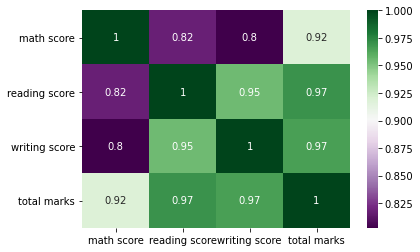

In [9]:
sns.heatmap(df.corr(),annot=True,cmap = 'PRGn')

## Visualization of  the data

#### Total number of female male

female    518
male      482
Name: gender, dtype: int64


<AxesSubplot:>

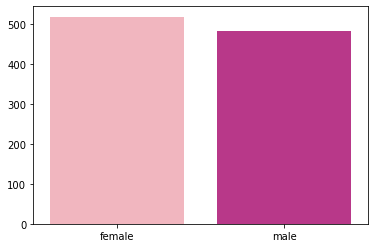

In [10]:
print(df['gender'].value_counts())
sns.barplot(x = df['gender'].value_counts().index, y = df['gender'].value_counts().values,palette = "RdPu")

#### Race/ethnicity 

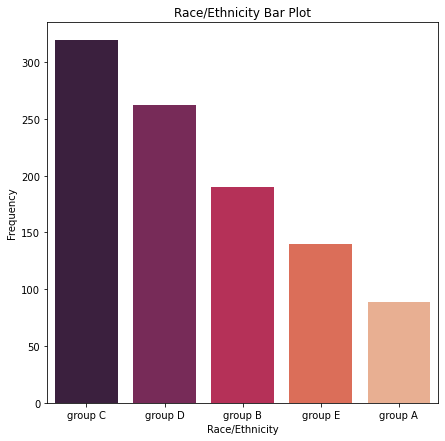

In [11]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['race/ethnicity'].value_counts().index,
              y=df['race/ethnicity'].value_counts().values,palette = 'rocket')

plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity Bar Plot')
plt.show()

#### Parental level of education

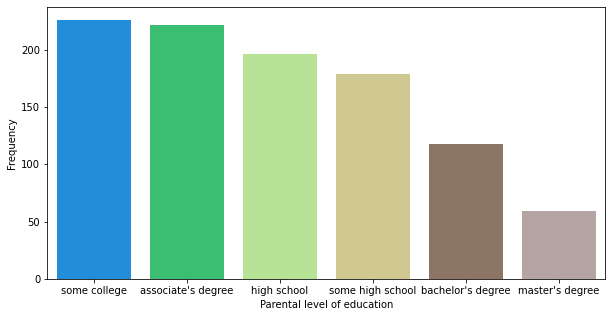

In [12]:
plt.figure(figsize = (10,5))
sns.barplot(x = df['parental level of education'].value_counts().index,
           y= df['parental level of education'].value_counts().values, palette = 'terrain')
plt.xlabel('Parental level of education')
plt.ylabel('Frequency')
plt.show()

### Gender distribution in parental level of education v/s total marks

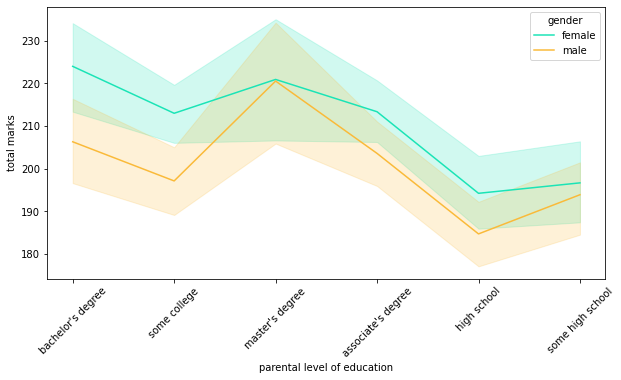

In [13]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df, x = 'parental level of education',
           y = 'total marks', hue = 'gender', palette="turbo")
plt.xticks(rotation = 45)
plt.show()

### Test preparation course distribution in parental level of education v/s total marks

<AxesSubplot:xlabel='parental level of education', ylabel='total marks'>

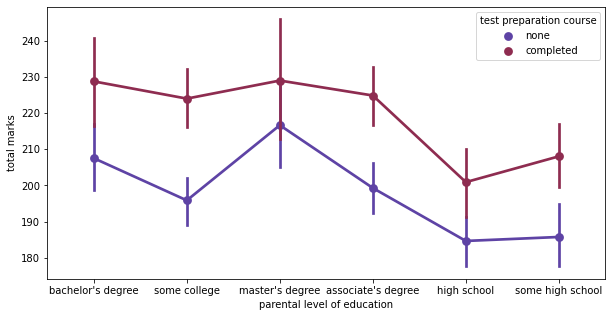

In [14]:
plt.figure(figsize = (10,5))
sns.pointplot(data = df, x = 'parental level of education',
           y = 'total marks',hue = 'test preparation course',palette = 'twilight' )

### Lunch data distribution in parental level of education v/s total marks

<AxesSubplot:xlabel='parental level of education', ylabel='total marks'>

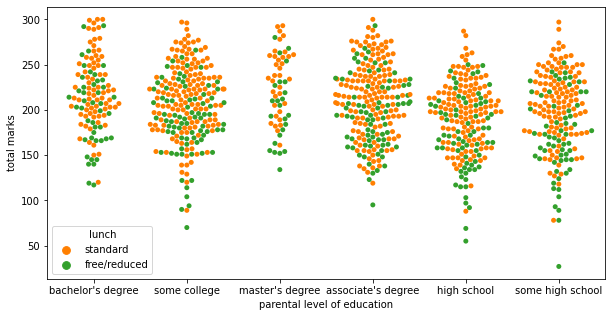

In [15]:
plt.figure(figsize = (10,5))
sns.swarmplot(data = df, x = 'parental level of education',
           y = 'total marks',hue = 'lunch',palette = 'Paired_r' )

## Understanding the factors effect on the score

### Parental level of education & test preparation course

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

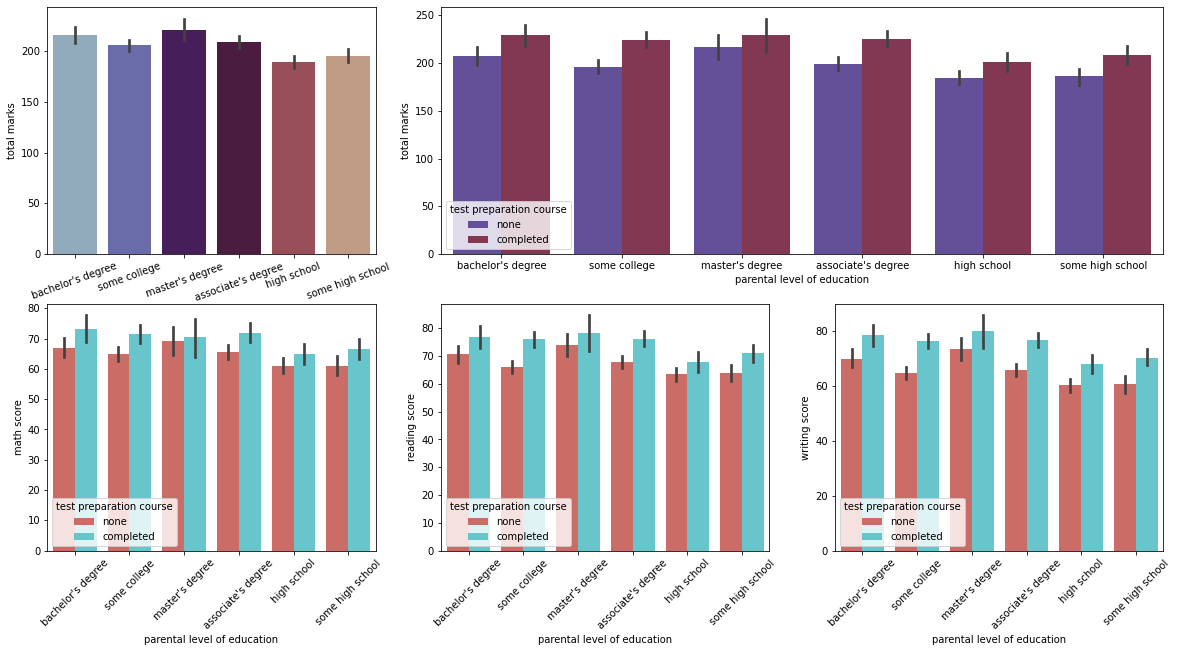

In [16]:
fig, axes = plt.subplots(2,3,figsize = (20,10))

ax = plt.subplot2grid(shape=(2, 3), loc=(0, 0), colspan=1)
sns.barplot(ax = ax,data = df, x = 'parental level of education',
           y = 'total marks' ,palette = 'twilight')
plt.xticks(rotation = 20)

ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 1), colspan=2)
sns.barplot(ax = ax1,data = df, x = 'parental level of education',
           y = 'total marks',hue = 'test preparation course' ,palette = 'twilight')

ax2 = plt.subplot2grid(shape=(2, 3), loc=(1,0), colspan=1)
sns.barplot( ax = ax2,data = df, x = 'parental level of education',
           y = 'math score',hue = 'test preparation course',palette = 'hls')
plt.xticks(rotation=45)

ax3 = plt.subplot2grid(shape=(2, 3), loc=(1,1), colspan=1)
sns.barplot(ax = ax3,data = df, x = 'parental level of education',
           y = 'reading score',hue = 'test preparation course',palette = 'hls')
plt.xticks(rotation=45)

ax4 = plt.subplot2grid(shape=(2, 3), loc=(1,2), colspan=1)
sns.barplot(ax= ax4,data = df, x = 'parental level of education',
           y = 'writing score',hue = 'test preparation course',palette = 'hls' )
plt.xticks(rotation=45)

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

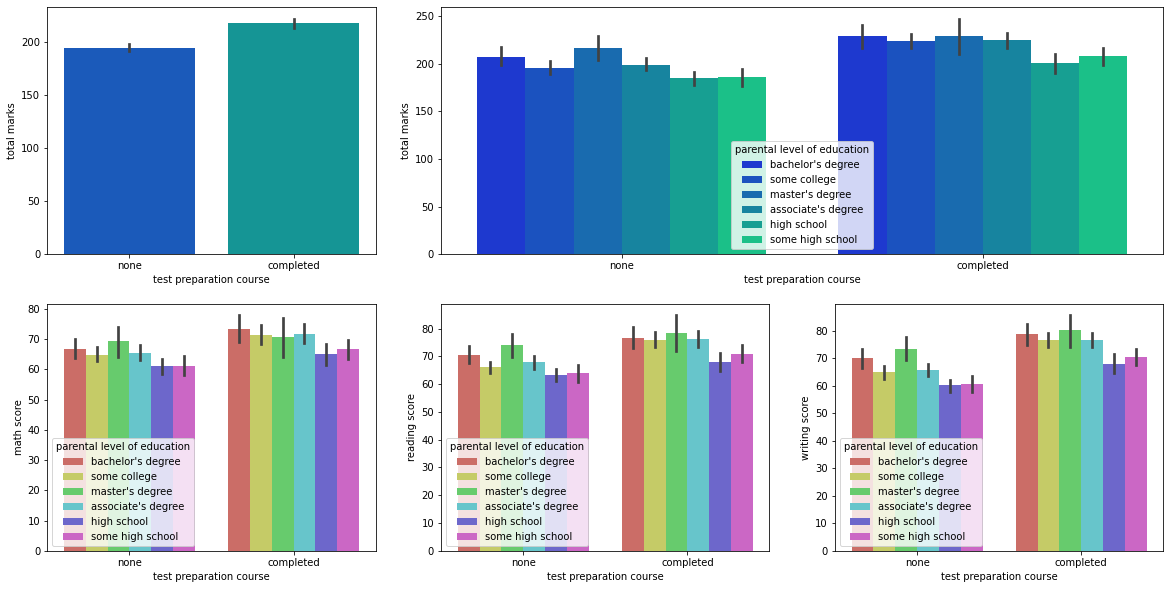

In [17]:
fig, axes = plt.subplots(2,3,figsize = (20,10))

ax = plt.subplot2grid(shape=(2, 3), loc=(0,0), colspan=1)
sns.barplot(ax= ax,data = df, x = 'test preparation course',
           y = 'total marks',palette = 'winter' )


ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 1), colspan=2)
sns.barplot(ax = ax1,data = df, x = 'test preparation course',
           y = 'total marks',hue = 'parental level of education' ,palette = 'winter')

ax2 = plt.subplot2grid(shape=(2, 3), loc=(1,0), colspan=1)
sns.barplot( ax = ax2,data = df, x = 'test preparation course',
           y = 'math score',hue = 'parental level of education',palette = 'hls')


ax3 = plt.subplot2grid(shape=(2, 3), loc=(1,1), colspan=1)
sns.barplot(ax = ax3,data = df, x = 'test preparation course',
           y = 'reading score',hue = 'parental level of education',palette = 'hls')


ax4 = plt.subplot2grid(shape=(2, 3), loc=(1,2), colspan=1)
sns.barplot(ax= ax4,data = df, x = 'test preparation course',
           y = 'writing score',hue = 'parental level of education',palette = 'hls' )


### Parental level of education & Gender

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

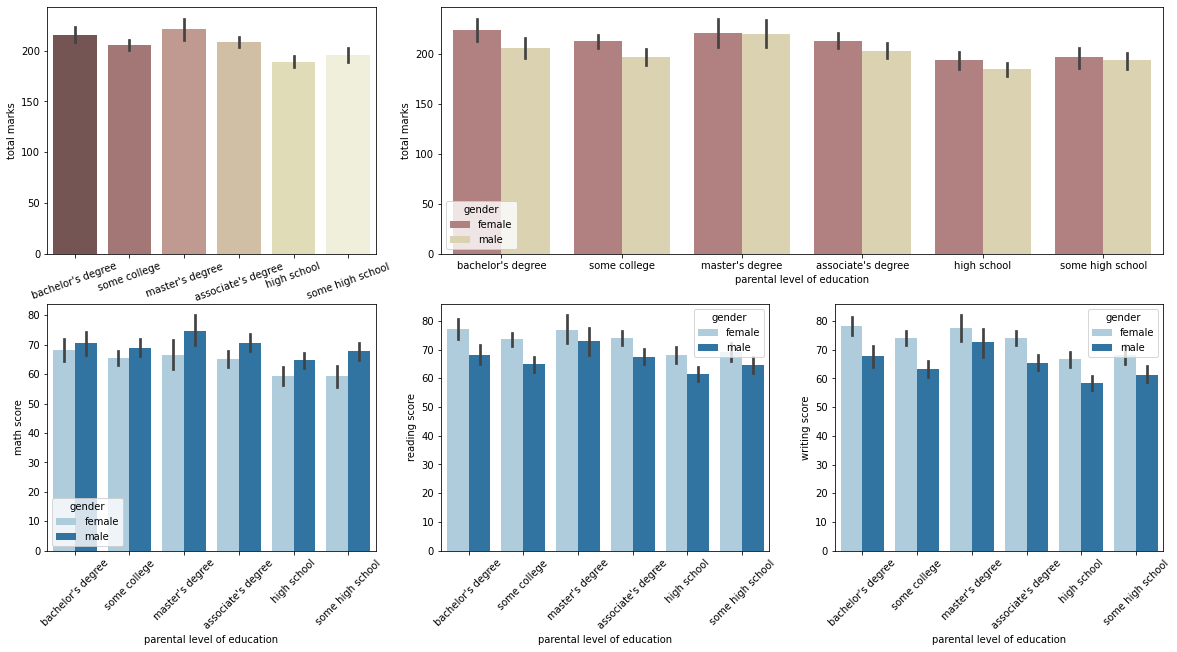

In [18]:
fig,ax = plt.subplots(2,3,figsize = (20,10))

ax = plt.subplot2grid(shape=(2,3) ,loc=(0,0),colspan=1)
sns.barplot(ax = ax, data = df, x = 'parental level of education',
           y = 'total marks',palette = 'pink')
plt.xticks(rotation = 20)

ax1 = plt.subplot2grid(shape=(2,3) ,loc=(0,1),colspan=2)
sns.barplot(ax = ax1, data = df, x = 'parental level of education',
           y = 'total marks', hue = 'gender',palette = 'pink')

ax2 = plt.subplot2grid(shape=(2, 3), loc=(1,0), colspan=1)
sns.barplot( ax = ax2,data = df, x = 'parental level of education',
           y = 'math score',hue = 'gender',palette = 'Paired' )
plt.xticks(rotation=45)

ax3 = plt.subplot2grid(shape=(2, 3), loc=(1,1), colspan=1)
sns.barplot(ax = ax3,data = df, x = 'parental level of education',
           y = 'reading score',hue = 'gender',palette = 'Paired')
plt.xticks(rotation=45)

ax4 = plt.subplot2grid(shape=(2, 3), loc=(1,2), colspan=1)
sns.barplot(ax= ax4,data = df, x = 'parental level of education',
           y = 'writing score',hue = 'gender',palette = 'Paired' )
plt.xticks(rotation=45)

<AxesSubplot:xlabel='gender', ylabel='writing score'>

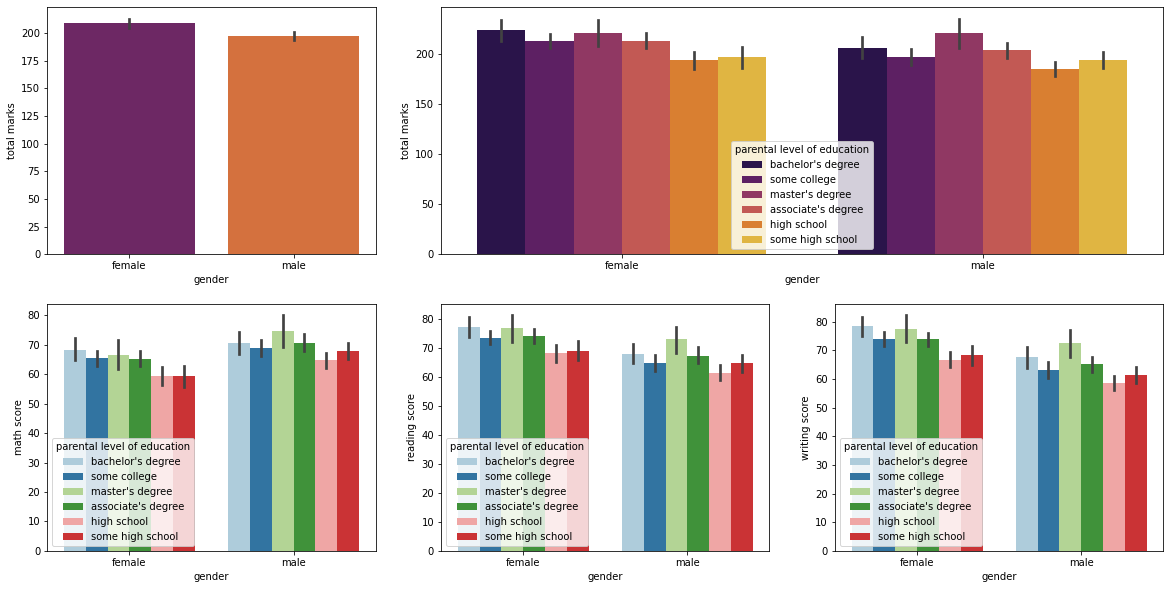

In [19]:
fig,ax = plt.subplots(2,3,figsize = (20,10))

ax = plt.subplot2grid(shape=(2, 3), loc=(0,0), colspan=1)
sns.barplot(ax= ax,data = df, x = 'gender',
           y = 'total marks',palette = 'inferno' )


ax1 = plt.subplot2grid(shape=(2,3) ,loc=(0,1),colspan=2)
sns.barplot(ax = ax1, data = df, x = 'gender',
           y = 'total marks', hue = 'parental level of education',palette = 'inferno')

ax2 = plt.subplot2grid(shape=(2, 3), loc=(1,0), colspan=1)
sns.barplot( ax = ax2,data = df, x = 'gender',
           y = 'math score',hue = 'parental level of education',palette = 'Paired' )

ax3 = plt.subplot2grid(shape=(2, 3), loc=(1,1), colspan=1)
sns.barplot(ax = ax3,data = df, x = 'gender',
           y = 'reading score',hue = 'parental level of education',palette = 'Paired')


ax4 = plt.subplot2grid(shape=(2, 3), loc=(1,2), colspan=1)
sns.barplot(ax= ax4,data = df, x = 'gender',
           y = 'writing score',hue = 'parental level of education',palette = 'Paired' )


### Parental level of education & Race/ethnicity

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

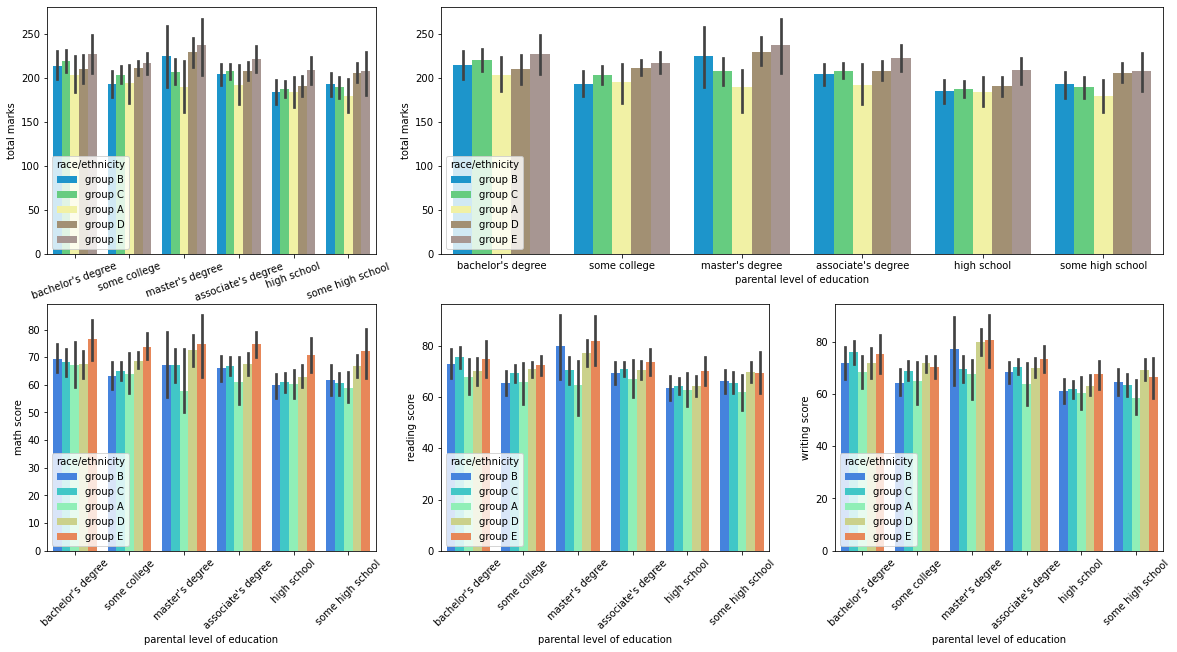

In [20]:
fig,ax = plt.subplots(2,3,figsize = (20,10))

ax = plt.subplot2grid(shape=(2,3) ,loc=(0,0),colspan=1)
sns.barplot(ax = ax, data = df, x = 'parental level of education',
           y = 'total marks', hue = 'race/ethnicity',palette = 'terrain')
plt.xticks(rotation = 20)

ax1 = plt.subplot2grid(shape=(2,3) ,loc=(0,1),colspan=2)
sns.barplot(ax = ax1, data = df, x = 'parental level of education',
           y = 'total marks', hue = 'race/ethnicity',palette = 'terrain')

ax2 = plt.subplot2grid(shape=(2, 3), loc=(1,0), colspan=1)
sns.barplot( ax = ax2,data = df, x = 'parental level of education',
           y = 'math score',hue = 'race/ethnicity',palette = 'rainbow' )
plt.xticks(rotation=45)

ax3 = plt.subplot2grid(shape=(2, 3), loc=(1,1), colspan=1)
sns.barplot(ax = ax3,data = df, x = 'parental level of education',
           y = 'reading score',hue = 'race/ethnicity',palette = 'rainbow')
plt.xticks(rotation=45)

ax4 = plt.subplot2grid(shape=(2, 3), loc=(1,2), colspan=1)
sns.barplot(ax= ax4,data = df, x = 'parental level of education',
           y = 'writing score',hue = 'race/ethnicity',palette = 'rainbow' )
plt.xticks(rotation=45)

<AxesSubplot:xlabel='total marks', ylabel='Count'>

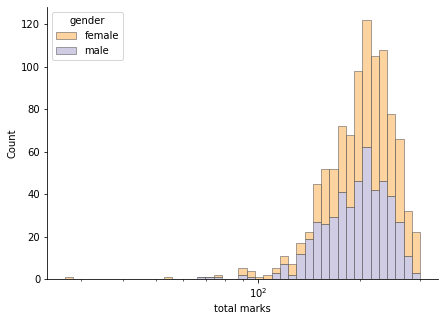

In [21]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="total marks", hue="gender",
    multiple="stack",
    palette="PuOr",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [22]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total marks'],
      dtype='object')

<AxesSubplot:xlabel='total marks', ylabel='Count'>

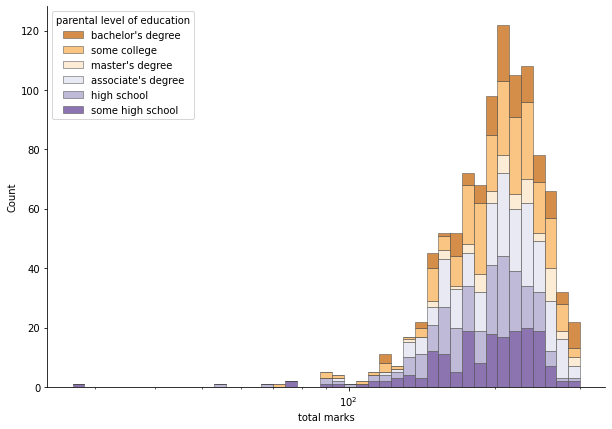

In [23]:
f, ax = plt.subplots(figsize=(10,7))
sns.despine(f)

sns.histplot(
    df,
    x="total marks", 
    hue="parental level of education",
    multiple="stack",
    palette="PuOr",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

<AxesSubplot:xlabel='writing score', ylabel='Count'>

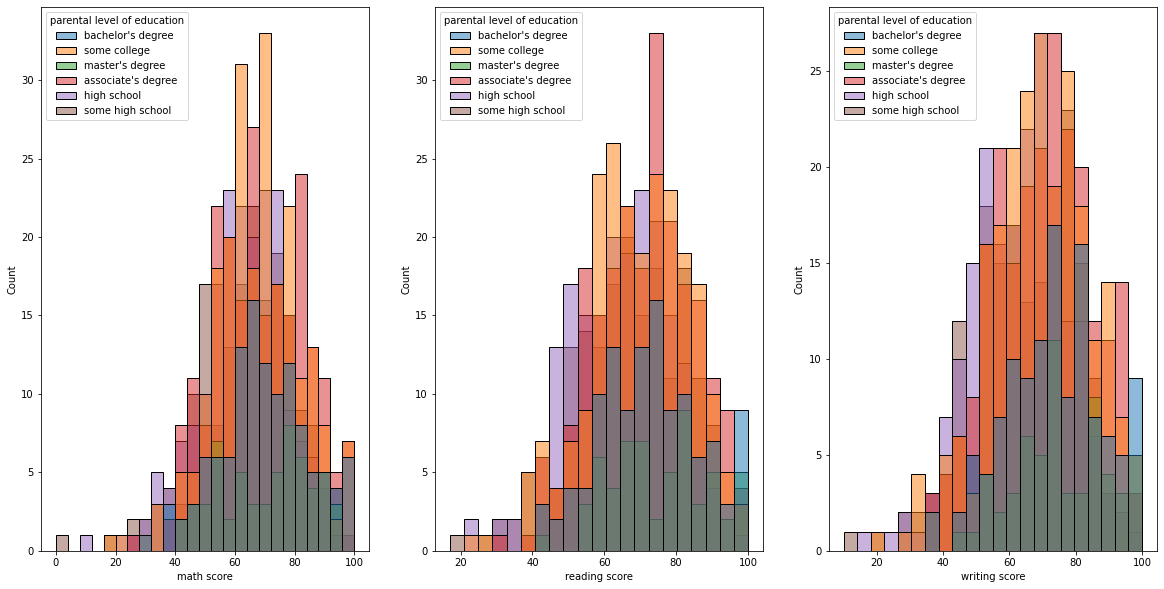

In [24]:
fig, ax = plt.subplots(1,3,figsize = (20,10))

ax1 = plt.subplot2grid(shape = (1,3),loc=(0,0) ,colspan= 1)
sns.histplot(df, x = 'math score', hue = 'parental level of education')

ax2 = plt.subplot2grid(shape = (1,3),loc=(0,1) ,colspan= 1)
sns.histplot(df, x = 'reading score', hue = 'parental level of education')

ax3 = plt.subplot2grid(shape = (1,3),loc=(0,2) ,colspan= 1)
sns.histplot(df, x = 'writing score', hue = 'parental level of education')




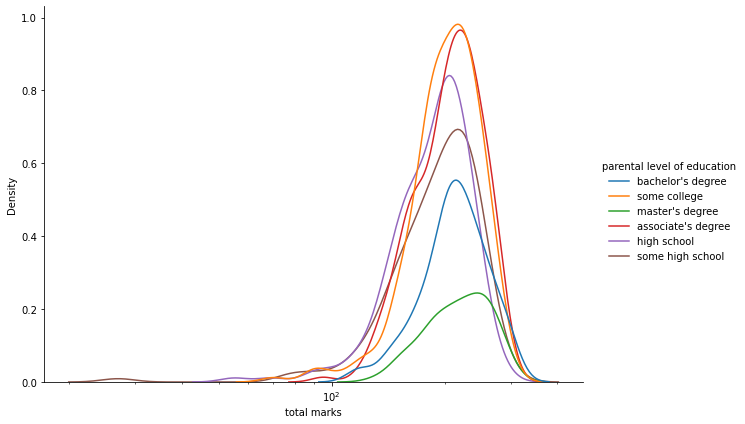

In [25]:
sns.displot(
  data=df,
  x="total marks",
  hue="parental level of education",
  kind="kde",
  height=6,
  aspect=1.4,
  log_scale=10
)